**Dual Moving Average Crossover** là một chiến lược giao dịch kỹ thuật đơn giản nhưng phổ biến, được sử dụng để xác định xu hướng giá và điểm mua/bán của một tài sản (chẳng hạn như cổ phiếu, tiền điện tử, hay ngoại hối,...)

**Cách thức thực hiện** sử dụng 2 đường trung bình động có chu kì ngắn và dài khác nhau tìm điểm giao nhau và xác định điểm mua/bán hợp lý
- **Đường trung bình động ngắn hạn (Short-term MA):** phản ứng nhanh hơn với biến động giá.
- **Đường trung bình động dài hạn (Long-term MA):** phản ánh xu hướng dài hạn của thị trường.

---

**Tín hiệu mua (Golden Cross):**
- Khi đường trung bình ngắn hạn cắt lên trên đường trung bình dài hạn.
- Cho thấy xu hướng tăng có thể bắt đầu.

**Tín hiệu bán (Death Cross):**
- Khi đường trung bình ngắn hạn cắt xuống dưới đường trung bình dài hạn.
- Cho thấy xu hướng giảm có thể bắt đầu.

In [1]:
import yfinance as yf

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

Tải dữ liệu cổ phiếu **NVDA** từ thư viện yfinance trong 1 năm gần nhất 

In [2]:
ticker = "NVDA" # Mã cổ phiếu Nvidia

df = yf.download(ticker, period="1y", progress=False)
df.columns = [col[0] for col in df.columns]
df.tail()


YF.download() has changed argument auto_adjust default to True


,Close,High,Low,Open,Volume
Date,,,,,
2025-03-31,108.379997,110.959999,103.650002,105.129997,299212700
2025-04-01,110.150002,110.199997,106.470001,108.519997,222614000
2025-04-02,110.419998,111.980003,106.790001,107.290001,220601200
2025-04-03,101.800003,105.629997,101.599998,103.510002,338769400
2025-04-04,94.309998,100.129997,92.110001,98.910004,529707700


Trực quan hóa dữ liệu, **biểu đồ đường** để xem **biến động giá của cổ phiếu NVDA**

In [3]:
fig = px.line(df, y="Close", title='NVDA Stock Price', labels = {'Close':'NVDA Close Price'})
fig


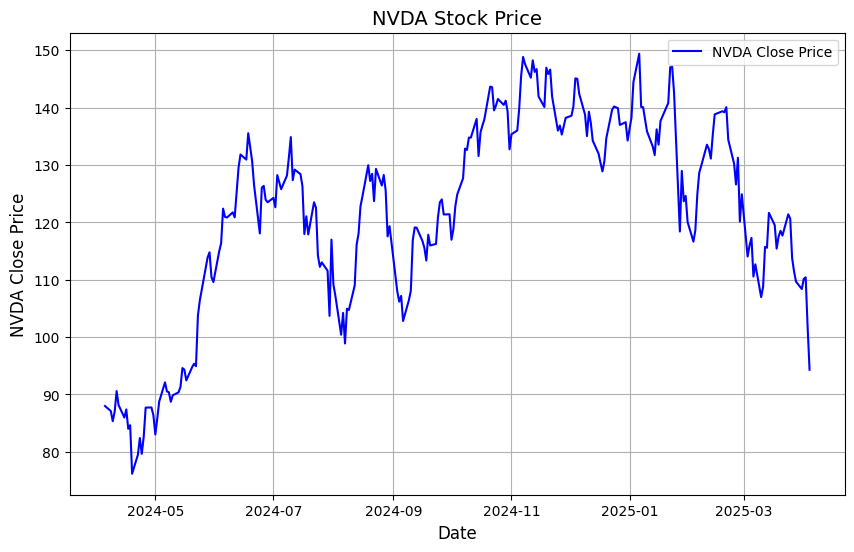

In [4]:
# Vẽ biểu đồ đường cho giá đóng cửa (Close)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='NVDA Close Price', color='blue', linewidth=1.5)

# Thiết lập tiêu đề và nhãn cho trục x, y
plt.title('NVDA Stock Price', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('NVDA Close Price', fontsize=12)

# Hiển thị biểu đồ
plt.grid(True)
plt.legend()

# Hiển thị biểu đồ
plt.show()


In [ ]:
# Lưu biểu đồ dưới dạng PNG (nếu cần)
# plt.savefig('nvda_stock_price_matplotlib.png')


## Tính đường trung bình động

**Trước tiền, hãy tìm hiểu một số đường trung bình động**

---

Trung bình động đơn giản (Simple Moving Average - **SMA**): là trung bình trong một khoảng thời gian.

$$SMA_{n}=\frac{C_1 + C_2 + C_3+ ... + C_n}{n}$$

Trong đó:
- **C - (Close)**: giá đóng cửa
- **n** là chu kì bạn muốn tính

Ưu và Khuyết điểm:
- **Ưu điểm:** là một đường trung bình động đơn giản, dễ tính toán và hiểu.
- **Khuyết điểm:** dễ ảnh hưởng bởi nhiễu

---

Trung bình động lũy thừa (Exponential Moving Average - **EMA**): tính toán bằng cách gán **mức độ trọng số** khác nhau cho các giá trị gần, giúp đường EMA mượt hơn và nhạy cảm hơn với biến động gần trên thị trường.

Công thức tổng quát:

$$EMA_t = (C_t \times \alpha) + (EMA_{t-1} \times (1 - \alpha))$$

$$EMA_t = (Close_t - Close_{t-1})\times \alpha + EMA_{t-1}$$

Trong đó:
- **C - (Close)**: giá đóng cửa
- **t**: thời điểm tính EMA
- **t-1**: thời điểm trước đó
- **$\alpha$**: là hệ số chọn trước, xác định mức độ ảnh hưởng của giá gần đây đến giá trị EMA


